In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
# Set the path to the dataset folders
train_path = r'C:\Users\Hassan\Downloads\car_data\car_data\train'
test_path = r'C:\Users\Hassan\Downloads\car_data\car_data\test'

In [10]:
# Model hyperparameters
batch_size = 32
epochs = 10
input_shape = (128, 128, 3)  # Adjust input shape based on your dataset

In [11]:
# Load the dataset using the Keras ImageDataGenerator
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2  # Adjust the validation split based on your preference
)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 6598 images belonging to 196 classes.
Found 1546 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [12]:
# Deep Neural Network (DNN) model
dnn_model = models.Sequential()
dnn_model.add(layers.Flatten(input_shape=input_shape))
dnn_model.add(layers.Dense(256, activation='relu'))
dnn_model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [13]:
# Customized CNN model
custom_cnn_model = models.Sequential()
custom_cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
# Add more Conv2D, MaxPooling2D, and Dropout layers as needed
custom_cnn_model.add(layers.Flatten())
custom_cnn_model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


In [14]:
# Fine-tuned CNN model (using VGG16 as an example)
base_model = keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

In [15]:
# Freeze the base model layers
base_model.trainable = False

fine_tuned_cnn_model = models.Sequential()
fine_tuned_cnn_model.add(base_model)

In [16]:
# Add more layers on top of the base model as needed
fine_tuned_cnn_model.add(layers.GlobalAveragePooling2D())
fine_tuned_cnn_model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [17]:
# Compile models
dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
custom_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fine_tuned_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Train models
dnn_model.fit(train_generator, validation_data=validation_generator, epochs=epochs)
custom_cnn_model.fit(train_generator, validation_data=validation_generator, epochs=epochs)
fine_tuned_cnn_model.fit(train_generator, validation_data=validation_generator, epochs=epochs)

Epoch 1/10
207/207 [==============================] - 75s 361ms/step - loss: 7.6875 - accuracy: 0.0070 - val_loss: 5.2773 - val_accuracy: 0.0084
Epoch 2/10
207/207 [==============================] - 72s 346ms/step - loss: 5.2826 - accuracy: 0.0085 - val_loss: 5.2766 - val_accuracy: 0.0084
Epoch 3/10
207/207 [==============================] - 74s 356ms/step - loss: 5.2774 - accuracy: 0.0083 - val_loss: 5.2760 - val_accuracy: 0.0084
Epoch 4/10
207/207 [==============================] - 73s 354ms/step - loss: 5.2766 - accuracy: 0.0083 - val_loss: 5.2754 - val_accuracy: 0.0084
Epoch 5/10
207/207 [==============================] - 73s 354ms/step - loss: 5.2759 - accuracy: 0.0085 - val_loss: 5.2750 - val_accuracy: 0.0084
Epoch 6/10
207/207 [==============================] - 75s 362ms/step - loss: 5.2753 - accuracy: 0.0085 - val_loss: 5.2746 - val_accuracy: 0.0084
Epoch 7/10
207/207 [==============================] - 74s 356ms/step - loss: 5.2747 - accuracy: 0.0085 - val_loss: 5.2742 - val_ac

In [19]:
# Evaluate models on the test set
dnn_scores = dnn_model.evaluate(test_generator)
custom_cnn_scores = custom_cnn_model.evaluate(test_generator)
fine_tuned_cnn_scores = fine_tuned_cnn_model.evaluate(test_generator)

252/252 [==============================] - 318s 1s/step - loss: 4.4959 - accuracy: 0.1077


In [27]:
# Get predictions on car images
car_image_paths = [r"C:\Users\Hassan\Downloads\car_data\car_data\test\Acura Integra Type R 2001\00128.jpg", r"C:\Users\Hassan\Downloads\car_data\car_data\test\Acura RL Sedan 2012\00183.jpg"]  # Add your car image paths
car_images = [keras.preprocessing.image.load_img(path, target_size=input_shape[:2]) for path in car_image_paths]
car_images = np.array([keras.preprocessing.image.img_to_array(img) for img in car_images]) / 255.0

In [28]:
# Check the shape of car_images array
print("Shape of car_images:", car_images.shape)

Shape of car_images: (2, 128, 128, 3)


In [29]:
dnn_predictions = dnn_model.predict(car_images)
custom_cnn_predictions = custom_cnn_model.predict(car_images)
fine_tuned_cnn_predictions = fine_tuned_cnn_model.predict(car_images)

1/1 [==============================] - 0s 105ms/step


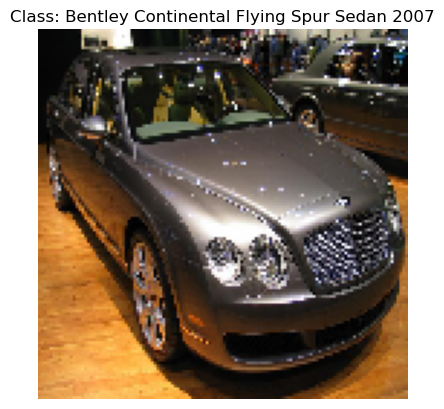

1/1 [==============================] - 0s 104ms/step


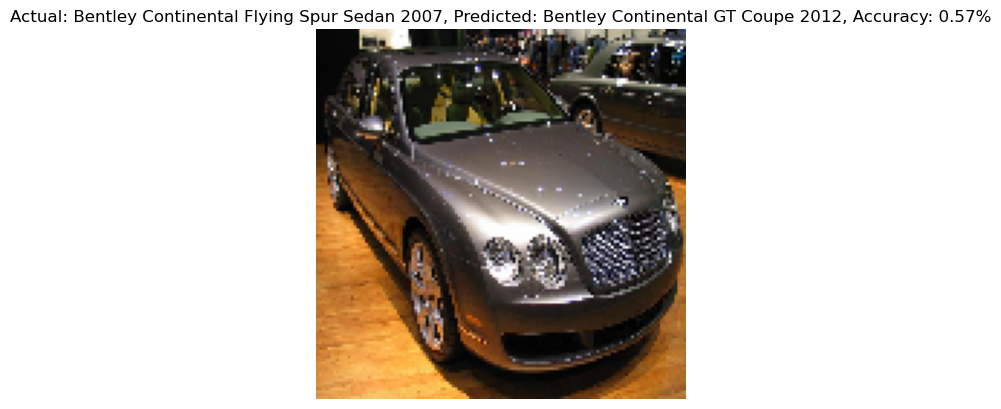

In [122]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Set the path to your test directory
test_directory = r'C:\Users\Hassan\Downloads\car_data\car_data\test'

# Get the class indices from the directory structure
class_indices = {}
for i, class_name in enumerate(os.listdir(test_directory)):
    class_indices[class_name] = i

# Get the label names
label_names = list(class_indices.keys())

# Get a random class from the test directory
class_name = random.choice(list(class_indices.keys()))
class_index = class_indices[class_name]
class_path = os.path.join(test_directory, class_name)

# Get a random image from the selected class
image_name = random.choice(os.listdir(class_path))
image_path = os.path.join(class_path, image_name)

# Load and display the image
car_image = image.load_img(image_path, target_size=(128, 128))
plt.imshow(car_image)
plt.title(f"Class: {class_name}")
plt.axis('off')
plt.show()

# Preprocess the image
img = image.load_img(image_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = img_array / 255.0  # Normalize the image array

# Reshape and expand dimensions for prediction
img_array = img_array.reshape((1, 128, 128, 3))

# Make the prediction using the CNN model you trained
predictions = dnn_model.predict(img_array)
predicted_label = predictions.argmax()
actual_label = class_index

# Calculate accuracy
accuracy = predictions[0][actual_label] * 100

# Display the prediction result and accuracy
plt.imshow(car_image)
plt.title(f"Actual: {label_names[actual_label]}, Predicted: {label_names[predicted_label]}, Accuracy: {accuracy:.2f}%")
plt.axis('off')
plt.show()


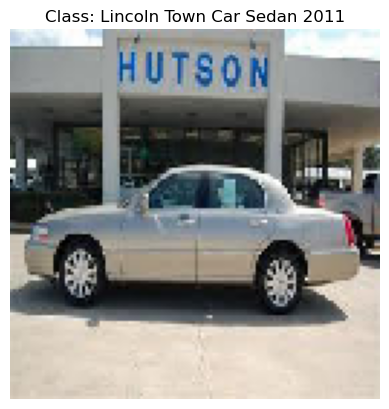

1/1 [==============================] - 0s 142ms/step


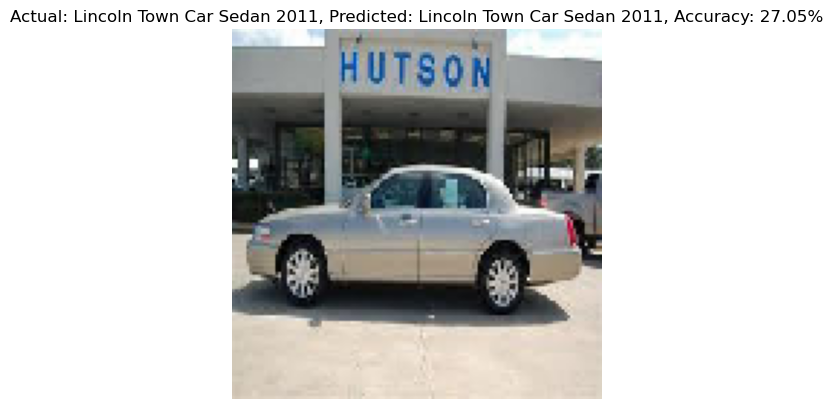

In [108]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Set the path to your test directory
test_directory = r'C:\Users\Hassan\Downloads\car_data\car_data\test'

# Get the class indices from the directory structure
class_indices = {}
for i, class_name in enumerate(os.listdir(test_directory)):
    class_indices[class_name] = i

# Get the label names
label_names = list(class_indices.keys())

# Get a random class from the test directory
class_name = random.choice(list(class_indices.keys()))
class_index = class_indices[class_name]
class_path = os.path.join(test_directory, class_name)

# Get a random image from the selected class
image_name = random.choice(os.listdir(class_path))
image_path = os.path.join(class_path, image_name)

# Load and display the image
car_image = image.load_img(image_path, target_size=(128, 128))
plt.imshow(car_image)
plt.title(f"Class: {class_name}")
plt.axis('off')
plt.show()

# Preprocess the image
img = image.load_img(image_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = img_array / 255.0  # Normalize the image array

# Reshape and expand dimensions for prediction
img_array = img_array.reshape((1, 128, 128, 3))

# Make the prediction using the CNN model you trained
predictions = custom_cnn_model.predict(img_array)
predicted_label = predictions.argmax()
actual_label = class_index

# Calculate accuracy
accuracy = predictions[0][actual_label] * 100

# Display the prediction result and accuracy
plt.imshow(car_image)
plt.title(f"Actual: {label_names[actual_label]}, Predicted: {label_names[predicted_label]}, Accuracy: {accuracy:.2f}%")
plt.axis('off')
plt.show()


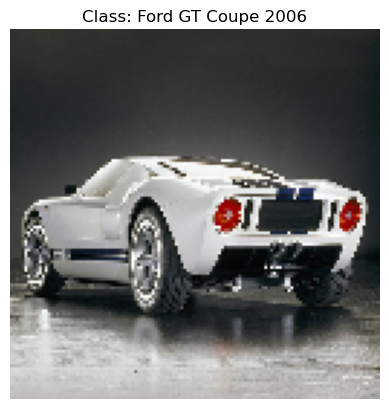

1/1 [==============================] - 0s 175ms/step


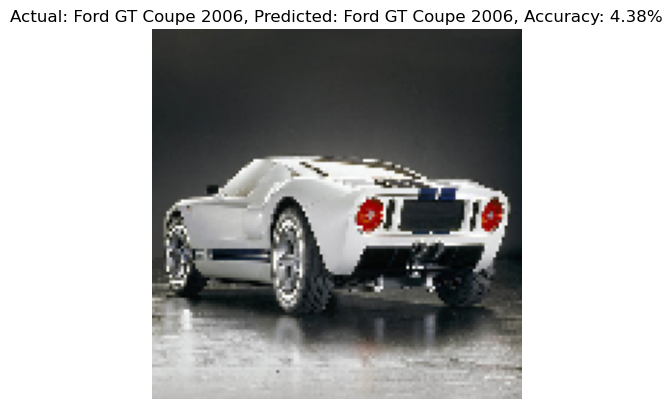

In [86]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Set the path to your test directory
test_directory = r'C:\Users\Hassan\Downloads\car_data\car_data\test'

# Get the class indices from the directory structure
class_indices = {}
for i, class_name in enumerate(os.listdir(test_directory)):
    class_indices[class_name] = i

# Get the label names
label_names = list(class_indices.keys())

# Get a random class from the test directory
class_name = random.choice(list(class_indices.keys()))
class_index = class_indices[class_name]
class_path = os.path.join(test_directory, class_name)

# Get a random image from the selected class
image_name = random.choice(os.listdir(class_path))
image_path = os.path.join(class_path, image_name)

# Load and display the image
car_image = image.load_img(image_path, target_size=(128, 128))
plt.imshow(car_image)
plt.title(f"Class: {class_name}")
plt.axis('off')
plt.show()

# Preprocess the image
img = image.load_img(image_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = img_array / 255.0  # Normalize the image array

# Reshape and expand dimensions for prediction
img_array = img_array.reshape((1, 128, 128, 3))

# Make the prediction using the CNN model you trained
predictions = fine_tuned_cnn_model.predict(img_array)
predicted_label = predictions.argmax()
actual_label = class_index

# Calculate accuracy
accuracy = predictions[0][actual_label] * 100

# Display the prediction result and accuracy
plt.imshow(car_image)
plt.title(f"Actual: {label_names[actual_label]}, Predicted: {label_names[predicted_label]}, Accuracy: {accuracy:.2f}%")
plt.axis('off')
plt.show()
